Create a word-cloud?



In [ ]:
var D3Node = require('d3-node');
var cloud = require('d3-cloud');
var Canvas = require('canvas');

var margin = {top: 20, right: 20, bottom: 30, left: 50},
    width = 960 - margin.left - margin.right,
    height = 500 - margin.top - margin.bottom;

function drawD3Cloud(wordCount) {
    var d3n = new D3Node(); // initializes D3 with container element 
    var d3 = d3n.d3;
    var fill = d3.scaleOrdinal(d3.schemeCategory20);

    d3n.createSVG(
        width + margin.left + margin.right,
        height + margin.top + margin.bottom)
        .append('g')
        .attr(
            'transform',
            'translate(' + (margin.left + width / 2) + ',' + (margin.top + height / 2) + ')')
        .selectAll('text')
        .data(wordCount)
        .enter().append('text')
        .style('font-size', function (d) {
            return d.size + 'px';
        })
        .style('font-family', 'Impact')
        .style('fill', function (d, i) {
            return fill(i);
        })
        .attr('text-anchor', 'middle')
        .attr('transform', function (d) {
            return 'translate(' + [d.x, d.y] + ')rotate(' + d.rotate + ')';
        })
        .text(function (d) {
            return d.text;
        });

    return d3n.svgString();
};
function d3CloudToSVG(wordCount) {
    return new Promise(resolve => {
        cloud()
            .canvas(function () {
                return new Canvas(1, 1);
            })
            .size([width, height])
            .words(wordCount)
            .padding(0)
            .rotate(function () {
                return ~~(Math.random() * 120) - 60;
            })
            .font('Impact')
            .fontSize(function (d) {
                return d.size;
            })
            .on('end', function (wordCount) {
                resolve(drawD3Cloud(wordCount));
            })
            .start();
    });
};
module.exports = d3CloudToSVG;



d3 tiered pie chart?


In [9]:
// source: https://github.com/rangle/augury/blob/dev/src/frontend/components/router-tree/router-tree.ts
var D3Node = require('d3-node');

var margin = {top: 25, right: 150, bottom: 25, left: 150},
    width = 960 - margin.left - margin.right,
    height = 500 - margin.top - margin.bottom;

function d3TieredPieSVG(nodes) {
    var d3n = new D3Node(); // initializes D3 with container element 
    var d3 = d3n.d3;

    var fill = d3.scaleOrdinal(d3.schemeCategory20);

    var svg = d3n.createSVG(
        width + margin.left + margin.right,
        height + margin.top + margin.bottom)
    var g = svg.append('g');
    
    // display sunburst with lines between
    var radius = Math.min(width, height) / 4

    var x = d3.scaleLinear().range([0, 2 * Math.PI]);
    var y = d3.scaleLinear().range([0, radius]);

    var partition = d3.partition()
    var tree = d3.hierarchy(nodes[0], d => d.children);
    var root = // partition(
        tree.sum(d => 1)
            .sort((a, b) => b.size - a.size || b.value - a.value)
            //)
            .descendants();
    root.forEach(r => {
        r.name = r.data.name;
        r.index = r.data.index;
        r.branch = r.data.branch;
    })
    var tree = d3.hierarchy(root[0], d => d.depth < 3 ? d.children : []);
    var root = partition(tree.sum(d => 1)).descendants();

    var arc = d3.arc()
        .startAngle(function (d) {
            return Math.max(0, Math.min(2 * Math.PI, x(d.x0)));
        })
        .endAngle(function (d) {
            return Math.max(0, Math.min(2 * Math.PI, x(d.x1)));
        })
        .innerRadius(function (d) {
            return Math.max(0, d.depth == 0
                ? 0 : (d.depth == 1 ? y(1 / 3) : y(d.depth)));
        })
        .outerRadius(function (d) {
            return Math.max(0, d.depth == 0
                ? 0 : y(d.depth + 1));
        });

    // Interpolate the arcs in data space.
    function arcTween(a) {
        var i = d3.interpolate({x: a.x0, dx: a.dx0}, a);
        return function (t) {
            var b = i(t);
            a.x0 = b.x;
            a.dx0 = b.dx;
            return arc(b);
        };
    }

    var path = g.selectAll('path')
        .data(root)
        .enter().append('path')
        //            .attr("display", function(d) { return d.depth ? null : "none"; }) // hide inner ring
        .attr('d', arc)
        .style('stroke', '#fff')
        .style('fill', function (d, i) {
            return fill(i);
        })
        .style('fill-rule', 'evenodd')

    function computeTextRotation(d) {
        return (x((d.x0 + d.x1) / 2) - Math.PI / 2) / Math.PI * 180;
    }

    g.selectAll('text')
        .data(root.filter(d => d.depth == 1))
        .enter().append('text')
        .attr('transform', function (d) {
            return 'rotate(' + computeTextRotation(d) + ')';
        })
        .attr('x', d => y(d.depth + 1))
        .attr('dx', '-6') // margin
        .attr('dy', '.35em') // vertical-align
        .attr('text-anchor', (d) => 'end')
        .text(d => (d.data).name)
        .attr('class', 'monospace');

    /*
    path
        .data(partition.value(d => d.data.size).nodes)
        .attrTween("d", arcTween);
*/

    // reset transform
    g.attr('transform', 'translate(0, 0)');

    g.attr(
        'transform',
        'translate(' + (margin.left + width / 2) + ',' + (margin.top + height / 2) + ')')

    return Promise.resolve(d3n.svgString());

};
module.exports = d3TieredPieSVG;


[Function: d3TreeToSVG]

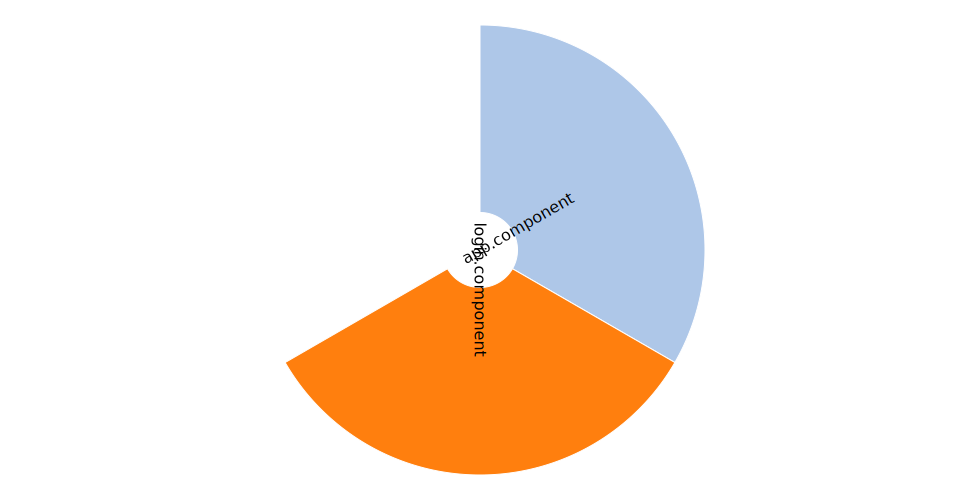

In [10]:
$$.async()

d3TreeToSVG([
    {
        name: '@angular/core'
    },
    {
        name: 'app.component'
    },
    {
        name: 'login.component'
    }
], [
    {
        source: '@angular/core',
        target: 'app.component'
    },
    {
        source: '@angular/core',
        target: 'login.component'
    }

])
    .then(svg => $$.svg(svg))
    .catch(e => $$.sendError(e));



d3 pie chart?

In [ ]:
var D3Node = require('d3-node');

var margin = {top: 100, right: 100, bottom: 100, left: 100},
    width = 960 - margin.left - margin.right,
    height = 500 - margin.top - margin.bottom;

function d3PieChart(values) {
    var d3n = new D3Node(); // initializes D3 with container element 
    var d3 = d3n.d3;
    var svg = d3n.createSVG(
        width + margin.left + margin.right,
        height + margin.top + margin.bottom)
    var radius = Math.min(width, height) / 2;
    var g = svg.append('g')
        .attr('transform', 'translate(' + (width / 2 + margin.left) + ',' + (height / 2 + margin.top) + ')');

    var color = d3.scaleOrdinal(d3.schemeCategory20);

    var pie = d3.pie()
        .sort(null)
        .value(function (d) {
            return d.value;
        });

    var path = d3.arc()
        .outerRadius(radius - 10)
        .innerRadius(0);

    var label = d3.arc()
        .outerRadius(radius + 10)
        .innerRadius(radius + 10);

    var arc = g.selectAll('.arc')
        .data(pie(values))
        .enter().append('g')
        .attr('class', 'arc');

    arc.append('path')
        .attr('d', path)
        .attr('fill', function (d) {
            return color(d.data.label);
        });

    arc.append('text')
        .attr('transform', function (d) {
            return 'translate(' + label.centroid(d) + ')';
        })
        .attr('dy', '0.35em')
        .text(function (d) {
            return d.data.label + ' - ' + d.data.value;
        });

    return d3n.svgString();
}
module.exports = d3PieChart;



Format d3 tree?



In [ ]:
function formatNodes(nodes, edges) {
    var nodeMap = {};
    nodes.forEach(function (x) {
        if (typeof x.size == 'undefined') {
            x.size = 1;
        }
        nodeMap[x.name] = x;
    });

    edges.forEach(function (x) {
        if (typeof nodeMap[x.source].children == 'undefined') {
            nodeMap[x.source].children = [];
        }
        nodeMap[x.target].parent = nodeMap[x.source];
        nodeMap[x.source].children.push(nodeMap[x.target]);
        // return { parent: nodeMap[x.target], source: nodeMap[x.source], target: nodeMap[x.target] };
    });
    edges.forEach(function (x) {
        if (typeof nodeMap[x.target].branch != 'undefined' && nodeMap[x.target].branch != ''
            && typeof nodeMap[x.source].branch == 'undefined' || nodeMap[x.source].branch == '') {
            nodeMap[x.source].branch = nodeMap[x.target].branch;
        }
    });
    
    return nodes;
};
module.exports = formatNodes;


Display d3 tree?


In [ ]:
var D3Node = require('d3-node');

var margin = {top: 25, right: 300, bottom: 25, left: 25},
    width = 960 - margin.left - margin.right,
    height = 500 - margin.top - margin.bottom;

function displayBranches(nodes) {
    var d3n = new D3Node(); // initializes D3 with container element 
    var d3 = d3n.d3;

    var visited = [];
    var root = d3.hierarchy({ name: '', children: nodes }, d => {
        if(visited.indexOf(d) > -1) {
            return [];
        }
        visited.push(d);
        return d.children;
    })
        .sum(d => 1)
        .sort((a, b) => b.data.time - a.data.time || b.value - a.value)
        //)
        .descendants();
    
    var branches = root
        .map(r => (r.data.branch || '').replace('HEAD -> ', '').trim())
        .filter((b, i, arr) => arr.indexOf(b) === i)

    root.forEach(r => {
        r.name = r.data.name;
        r.index = r.data.index;
        r.branch = r.data.branch;
    })
    var nodes = d3.hierarchy(root[0], d => d.children)
        .descendants();
    var nodeNames = nodes.map(n => n.data.name);
    nodes = nodes
        .filter((n, i, arr) => nodeNames.indexOf(n.data.name) === i)
        //.map((n, i) => {
        //    Object.assign(n.data, {index: i})
        //    return n;
        //})
        .slice(1);

    var links = nodes.filter(n => n !== null && n.depth > 1);

    var fill = d3.scaleOrdinal(d3.schemeCategory20);
    var svg = d3n.createSVG(
        branches.length * 100 + margin.left + margin.right,
        (nodes.length + 1) * 20 + margin.top + margin.bottom)
    var g = svg.append('g');

    var x = d3.scaleLinear().range([branches.length * 100, 0]);
    var y = d3.scaleLinear().range([(nodes.length + 1) * 20, 0]);

    x.domain([0, branches.length]);
    y.domain([0, nodes.length]);

    function branchIndex(d) {
        var result = Math.min.apply(null, (d.data.branch || '')
            .split(/\s*,\s*/ig)
            .map(b => branches.indexOf(b))
            .filter(i => i > -1));
        if (!isFinite(result)) {
            result = d.depth;
        }
        return result;
    };

    g.selectAll('.link')
        .data(links)
        .enter().append('path')
        .attr('class', 'link')
        .attr('fill', 'none')
        .attr('stroke', 'rgba(0,0,0,0.3)')
        .attr('stroke-width', 2)
        .attr('d', d => `
            M${x(branchIndex(d))},${y(d.data.index)}
            C${x((branchIndex(d) + branchIndex(d.parent)) / 2.0)},
              ${y(d.data.index)} ${x((branchIndex(d) + branchIndex(d.parent)) / 2.0)},
              ${y(d.parent.data.index)} ${x(branchIndex(d.parent))},
              ${y(d.parent.data.index)}`);

    // Declare the nodes
    var node = g.selectAll('g.node')
        .data(nodes)
        .enter().append('g')
        .attr('class', 'node')
        .style('fill', function (d, i) {
            return fill(d.data.branch);
        })
        .attr('transform', d => `translate(${x(branchIndex(d))},${y(d.data.index)})`);

    node.append('circle')
        .attr('class', d => (d.data).isAux ? 'node-aux-route' : 'node-route')
        .attr('r', 6);

    node.append('text')
        .attr('x', (d) => 13)
        .attr('dy', '.35em')
        .attr('text-anchor', 'start')
        .attr('style', 'text-shadow:0 0 1px rgba(0,0,0,1), 0 0 1px rgba(0,0,0,1), 0 0 1px rgba(0,0,0,1);')
        .text(d => d.data.name + (d.data.branch && (typeof d.children === 'undefined'
                                || !d.children || d.children.filter(
                c => c.data.branch == d.data.branch) == 0) ? (' ( ' + d.data.branch + ' ) ') : ''))
        .attr('class', 'monospace');

    // reset transform
    g.attr('transform', 'translate(0, 0)');

    g.attr(
        'transform',
        'translate(' + (margin.left) + ',' + (margin.top) + ')')
    return d3n.svgString();
}
module.exports = displayBranches;
displayBranches;

